# Validação e Métricas de Performance

In [1]:
! pip install prophet==1.1.5 plotly

In [9]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from prophet import Prophet

CSV_PATH_BR_LAND_TEMP = './data/processed/brazil_land_temp.csv'

df_br = pd.read_csv(CSV_PATH_BR_LAND_TEMP, 
                    parse_dates=['dt'])

df = pd.DataFrame()

df['ds'] = df_br['dt']
df['y'] = df_br['AverageTemperature']

df.head()

,ds,y
0,1832-01-01,24.935
1,1832-02-01,24.505
2,1832-03-01,24.617
3,1832-04-01,23.990
4,1832-05-01,23.124


In [12]:
model = Prophet()

model.fit(df)

df_future = model.make_future_dataframe(periods=0)

predictions = model.predict(df_future)

predictions.head()

20:06:28 - cmdstanpy - INFO - Chain [1] start processing
20:06:28 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1832-01-01,23.960106,24.023500,25.150195,23.960106,23.960106,0.599845,0.599845,0.599845,0.599845,0.599845,0.599845,0.0,0.0,0.0,24.559951
1,1832-02-01,23.961198,23.989807,25.134687,23.961198,23.961198,0.581376,0.581376,0.581376,0.581376,0.581376,0.581376,0.0,0.0,0.0,24.542574
2,1832-03-01,23.962220,23.717275,24.901401,23.962220,23.962220,0.350025,0.350025,0.350025,0.350025,0.350025,0.350025,0.0,0.0,0.0,24.312245
3,1832-04-01,23.963312,23.251238,24.355963,23.963312,23.963312,-0.154410,-0.154410,-0.154410,-0.154410,-0.154410,-0.154410,0.0,0.0,0.0,23.808902
4,1832-05-01,23.964369,22.640754,23.735722,23.964369,23.964369,-0.780073,-0.780073,-0.780073,-0.780073,-0.780073,-0.780073,0.0,0.0,0.0,23.184296


> "[...] temos a região inicial chamada de initial , que corresponde ao primeiro período de treinamento. Em seguida, temos o cutoff : o ponto de corte, ou seja, é a data em que cada horizon começará. Para cada cutoff , o modelo é treinado em todos os dados até esse cutoff e, em seguida, uma previsão será feita para o período do horizon." pg. 84-85

In [15]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(model,
                         initial='7300 days', 
                         period='1865 days', 
                         horizon='3650 days')

df_cv.head()

  0%|          | 0/30 [00:00<?, ?it/s]

20:08:53 - cmdstanpy - INFO - Chain [1] start processing
20:08:53 - cmdstanpy - INFO - Chain [1] done processing
20:08:53 - cmdstanpy - INFO - Chain [1] start processing
20:08:53 - cmdstanpy - INFO - Chain [1] done processing
20:08:53 - cmdstanpy - INFO - Chain [1] start processing
20:08:53 - cmdstanpy - INFO - Chain [1] done processing
20:08:53 - cmdstanpy - INFO - Chain [1] start processing
20:08:53 - cmdstanpy - INFO - Chain [1] done processing
20:08:53 - cmdstanpy - INFO - Chain [1] start processing
20:08:53 - cmdstanpy - INFO - Chain [1] done processing
20:08:53 - cmdstanpy - INFO - Chain [1] start processing
20:08:53 - cmdstanpy - INFO - Chain [1] done processing
20:08:53 - cmdstanpy - INFO - Chain [1] start processing
20:08:53 - cmdstanpy - INFO - Chain [1] done processing
20:08:53 - cmdstanpy - INFO - Chain [1] start processing
20:08:53 - cmdstanpy - INFO - Chain [1] done processing
20:08:53 - cmdstanpy - INFO - Chain [1] start processing
20:08:54 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1855-08-01,24.373910,23.676119,25.065484,24.175,1855-07-06
1,1855-09-01,24.660009,23.980601,25.336403,24.490,1855-07-06
2,1855-10-01,25.044744,24.353169,25.710095,24.815,1855-07-06
3,1855-11-01,25.146343,24.457326,25.825053,24.941,1855-07-06
4,1855-12-01,25.114162,24.457820,25.796719,23.822,1855-07-06


In [16]:
df_cv['cutoff'].unique()

<DatetimeArray>
['1855-07-06 00:00:00', '1860-08-13 00:00:00', '1865-09-21 00:00:00',
 '1870-10-30 00:00:00', '1875-12-08 00:00:00', '1881-01-15 00:00:00',
 '1886-02-23 00:00:00', '1891-04-03 00:00:00', '1896-05-11 00:00:00',
 '1901-06-20 00:00:00', '1906-07-29 00:00:00', '1911-09-06 00:00:00',
 '1916-10-14 00:00:00', '1921-11-22 00:00:00', '1926-12-31 00:00:00',
 '1932-02-08 00:00:00', '1937-03-18 00:00:00', '1942-04-26 00:00:00',
 '1947-06-04 00:00:00', '1952-07-12 00:00:00', '1957-08-20 00:00:00',
 '1962-09-28 00:00:00', '1967-11-06 00:00:00', '1972-12-14 00:00:00',
 '1978-01-22 00:00:00', '1983-03-02 00:00:00', '1988-04-09 00:00:00',
 '1993-05-18 00:00:00', '1998-06-26 00:00:00', '2003-08-04 00:00:00']
Length: 30, dtype: datetime64[ns]

Text(0, 0.5, 'y')

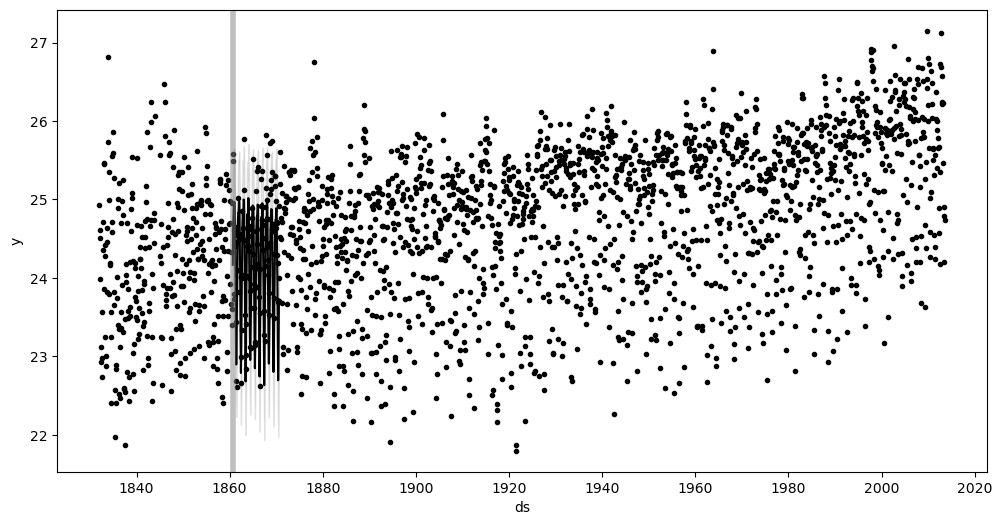

In [18]:
window = 1

cutoff = df_cv['cutoff'].unique()[window]

df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(111)

ax.plot(model.history['ds'].values,
        model.history['y'],
        'k.')

ax.plot(df_cv_cut['ds'].values,
        df_cv_cut['yhat'],
        ls='-',
        color='k')

ax.fill_between(df_cv_cut['ds'].values,
                df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'],
                color='grey',
                alpha=.2)

ax.axvline(x=pd.to_datetime(cutoff),
           c='gray',
           lw=4,
           alpha=.5)

ax.set_xlabel('ds')
ax.set_ylabel('y')

Text(0, 0.5, 'y')

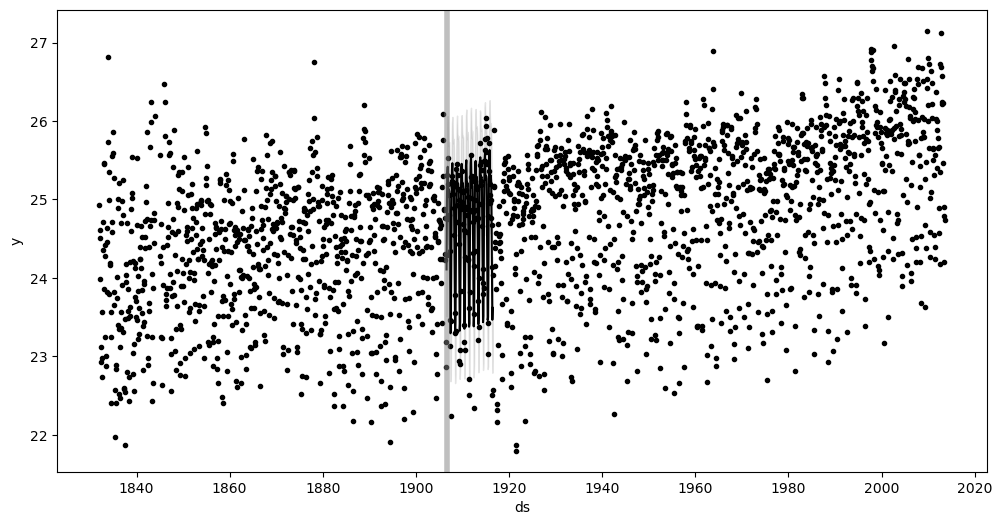

In [19]:
window = 10

cutoff = df_cv['cutoff'].unique()[window]

df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(111)

ax.plot(model.history['ds'].values,
        model.history['y'],
        'k.')

ax.plot(df_cv_cut['ds'].values,
        df_cv_cut['yhat'],
        ls='-',
        color='k')

ax.fill_between(df_cv_cut['ds'].values,
                df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'],
                color='grey',
                alpha=.2)

ax.axvline(x=pd.to_datetime(cutoff),
           c='gray',
           lw=4,
           alpha=.5)

ax.set_xlabel('ds')
ax.set_ylabel('y')

## Métricas para performance

In [20]:
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

df_p = performance_metrics(df_cv)

df_p.head().T

,0,1,2,3,4
horizon,364 days 00:00:00,365 days 00:00:00,366 days 00:00:00,367 days 00:00:00,368 days 00:00:00
mse,0.229349,0.228949,0.229548,0.230634,0.235418
rmse,0.478903,0.478486,0.479111,0.480243,0.485198
mae,0.37242,0.371829,0.372667,0.373835,0.377022
mape,0.015211,0.015187,0.01522,0.015267,0.015387
mdape,0.011969,0.011958,0.011969,0.011969,0.012098
smape,0.015174,0.01515,0.015184,0.01523,0.015352
coverage,0.799443,0.799443,0.799443,0.796657,0.792479


* **`mse` (Mean Squared Error)**: 
  * "É a soma da diferença quadrática entre cada valor de `y` real e o valor do `y` previsto. O _MSE_ é a métrica de desempenho mais utilizada, mas também tem seu lado negativo: a unidade de _MSE_ é o quadrado da sua unidade `y`, então não é tão simples de interpretar. Além disso, é sensível a _outliers_, embora isso possa ser desejável ou não, dependendo de seus dados e interpretação. Essa métrica nunca é negativa e quanto mais próxima de zero, melhor o modelo."
* **`rmse` (Root Mean Squared Error)**: 
  * "[...] dimensionar o _MSE_ para as mesmas unidades dos seus dados, obtendo a raiz quadrada. As vantagens e desvantagens são as mesmas da _MSE_, mas suas unidades são mais interpretáveis."
* **`mae` (Mean Absolute Error)**: 
  * "[...] semelhante ao MSE, exceto pelo fato de calcular o valor absoluto de erro em vez de elevar ao quadrado. _MAE_ pesa cada erro igualmente e, portanto, não coloca mais importância em _outliers_."
* **`mape` (Mean Absolute Percent Error)**: 
  * "[...] divide cada erro pelo valor do ponto de dados naquele erro e isso torna a métrica distorcida para representar os erros que ocorrem quando os valores são baixos. [...] como você está dividindo por cada valor `y`, se algum dos valores de `y` for igual a zero, o cálculo produzirá um erro de divisão. Além disso, valores muito pequenos de `y` podem causar problemas de cálculo de ponto flutuante. [...]"
* **`mdape` (Median Absolute Percent Error)**: 
  * "[...] segue a mesma lógica da _MAPE_, porém usa a mediana em vez da média. Pode ser útil usar essa métrica com dados ruidosos, que apresentam muitos _outliers_. Imagine que você esteja trabalhando com dados que tenham grandes picos significativos. [...]"
* **`coverage` (Coveage)**: 
  * "[...] porcentagem dos valores reais que se situam entre os limites de incerteza superior e inferior previstos. Por padrão, esses limites de incerteza cobrem 80% dos dados, [...]"

> pg. 91-92

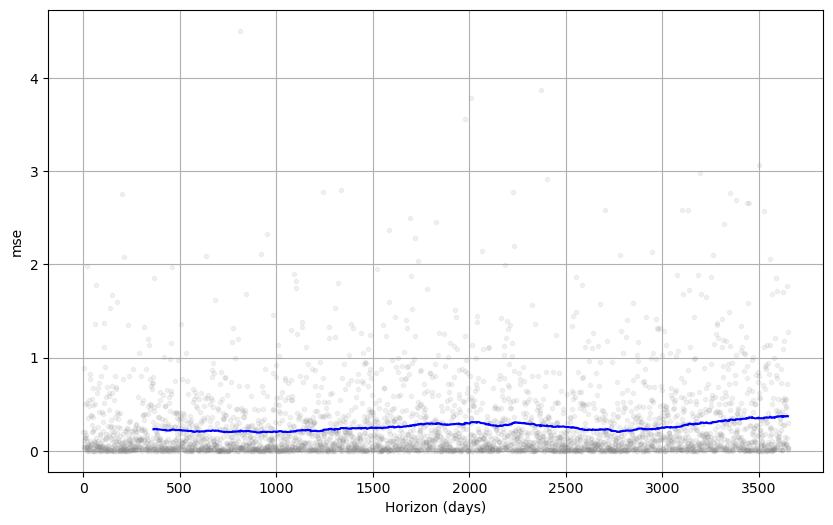

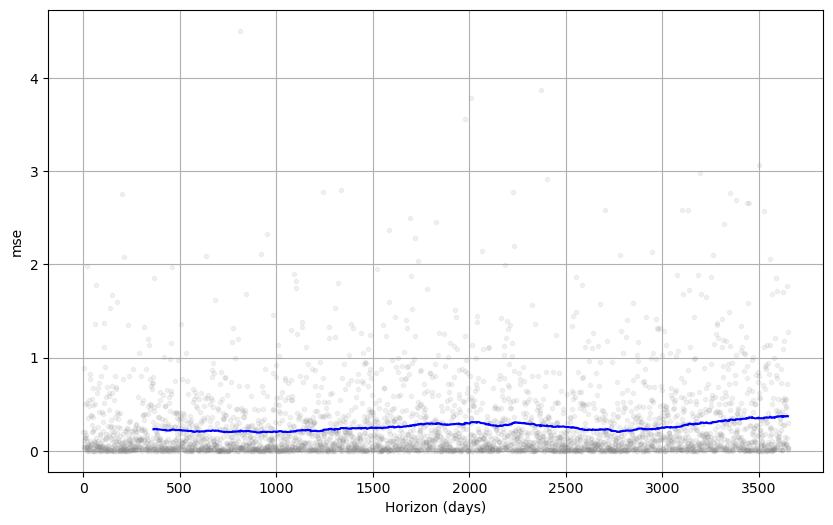

In [26]:
plot_cross_validation_metric(df_cv, metric='mse')